# 探索的データ解析チュートリアル

In [2]:
# 必要ライブラリのインポート
import pandas as pd

# pandasの列最大表示数を指定
pd.options.display.max_columns = 32

# matplotlib
import matplotlib.pyplot as plt

# numpy
import numpy as np

%matplotlib inline

In [4]:
# CSVファイルをPandasのDataFrame形式で読み込み
Iris = pd.read_csv('Iris.csv')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 基本的なデータ探索

In [11]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<img src="petal_sepal_label.png" height="80" width="120" />

In [16]:
# アヤメの種類ごとの特徴量のデータ分散を確認してみる
Irisdes = Iris.groupby(['Species'])
round(Irisdes.describe(),2)

Id                                                     \
                count   mean    std    min     25%    50%     75%    max   
Species                                                                    
Iris-setosa      50.0   25.5  14.58    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.58   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.58  101.0  113.25  125.5  137.75  150.0   

                PetalLengthCm                                        ...   \
                        count  mean   std  min  25%   50%   75%  max ...    
Species                                                              ...    
Iris-setosa              50.0  1.46  0.17  1.0  1.4  1.50  1.58  1.9 ...    
Iris-versicolor          50.0  4.26  0.47  3.0  4.0  4.35  4.60  5.1 ...    
Iris-virginica           50.0  5.55  0.55  4.5  5.1  5.55  5.88  6.9 ...    

                SepalLengthCm                                        \
                        count  mean   std  min   25%  50%  75%  max   
Species                                                               
Iris-setosa              50.0  5.01  0.35  4.3  4.80  5.0  5.2  5.8   
Iris-versicolor          50.0  5.94  0.52  4.9  5.60  5.9  6.3  7.0   
Iris-virginica           50.0  6.59  0.64  4.9  6.22  6.5  6.9  7.9   

                SepalWidthCm                                         
                       count  mean   std  min   25%  50%   75%  max  
Species                                                              
Iris-setosa             50.0  3.42  0.38  2.3  3.12  3.4  3.68  4.4  
Iris-versicolor         50.0  2.77  0.31  2.0  2.52  2.8  3.00  3.4  
Iris-virginica          50.0  2.97  0.32  2.2  2.80  3.0  3.18  3.8  

[3 rows x 40 columns]

In [17]:
# info()を使ってIrisデータフレームをみてみる
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


## カラムの値を確認する

In [18]:
# 特定のカラムのユニークな値を出力する
Iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
# value_counts()でSpeciesのカラムの情報をみてみよう
Iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## カラムをデータフレームから削除する

In [20]:
# データフレームからIdのカラムを削除する
Iris = Iris.drop(['Id'],axis=1)
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## データの可視化

### ヒストグラム

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cd70160>,
      dtype=object)

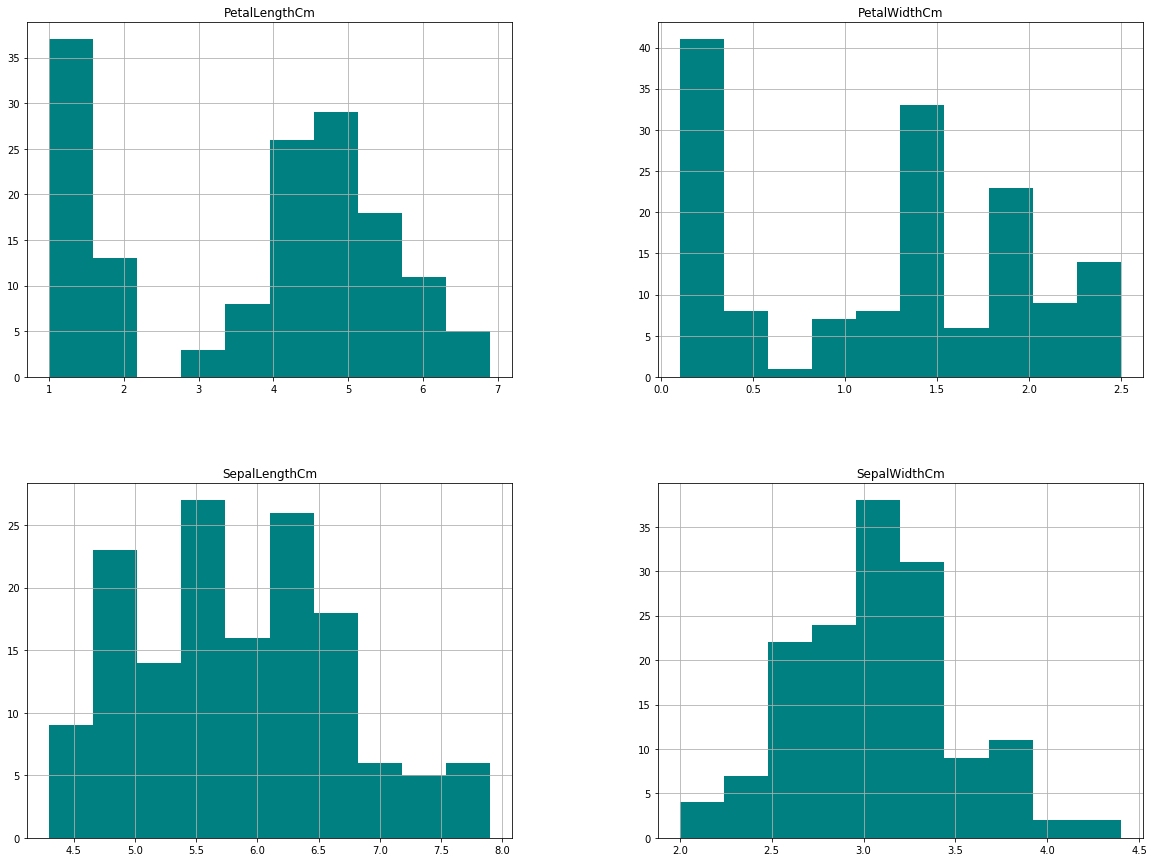

In [21]:
# Irisのデータフレームのヒストグラムを作成
Iris.hist(bins=10, figsize=(20,15), color='teal')

## 特徴量ごとに重ねたヒストグラムを作って確認

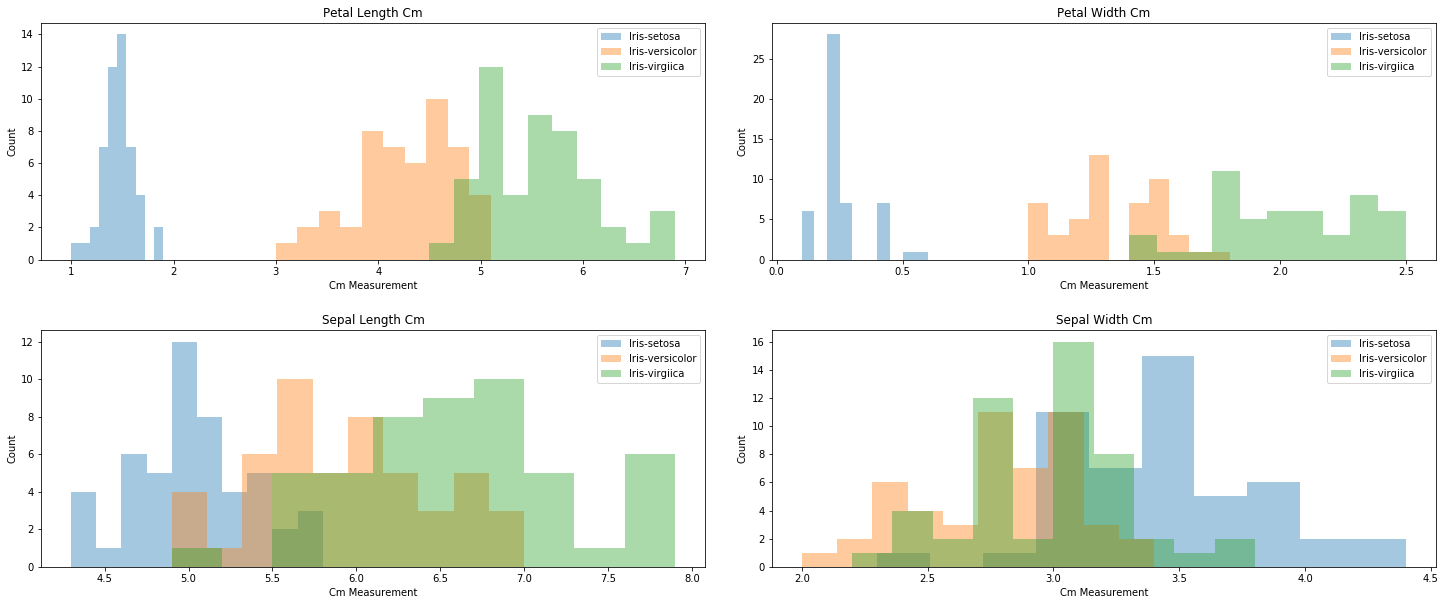

In [23]:
# ヒストグラムを作成
fig = plt.figure(figsize=(25,10))

p1 = fig.add_subplot(2,2,1)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-setosa'], bins=10, alpha=.4)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-versicolor'], bins=10, alpha=.4)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-virginica'], bins=10, alpha=.4)
plt.title('Petal Length Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa","Iris-versicolor","Iris-virgiica"]
plt.legend(labels)

p2 = fig.add_subplot(2,2,2)
p2.hist(Iris.PetalWidthCm[Iris.Species== 'Iris-setosa'], bins=10, alpha=.4)
p2.hist(Iris.PetalWidthCm[Iris.Species== 'Iris-versicolor'], bins=10, alpha=.4)
p2.hist(Iris.PetalWidthCm[Iris.Species== 'Iris-virginica'], bins=10, alpha=.4)
plt.title('Petal Width Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa","Iris-versicolor","Iris-virgiica"]
plt.legend(labels)

p3 = fig.add_subplot(2,2,3)
p3.hist(Iris.SepalLengthCm[Iris.Species=='Iris-setosa'], bins=10, alpha=.4)
p3.hist(Iris.SepalLengthCm[Iris.Species=='Iris-versicolor'], bins=10, alpha=.4)
p3.hist(Iris.SepalLengthCm[Iris.Species=='Iris-virginica'], bins=10, alpha=.4)
plt.title('Sepal Length Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa","Iris-versicolor","Iris-virgiica"]
plt.legend(labels)

p4 = fig.add_subplot(2,2,4)
p4.hist(Iris.SepalWidthCm[Iris.Species=='Iris-setosa'], bins=10, alpha=.4)
p4.hist(Iris.SepalWidthCm[Iris.Species=='Iris-versicolor'], bins=10, alpha=.4)
p4.hist(Iris.SepalWidthCm[Iris.Species=='Iris-virginica'], bins=10, alpha=.4)
plt.title('Sepal Width Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa","Iris-versicolor","Iris-virgiica"]
plt.legend(labels)

plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

## 散布図（スキャタープロット）

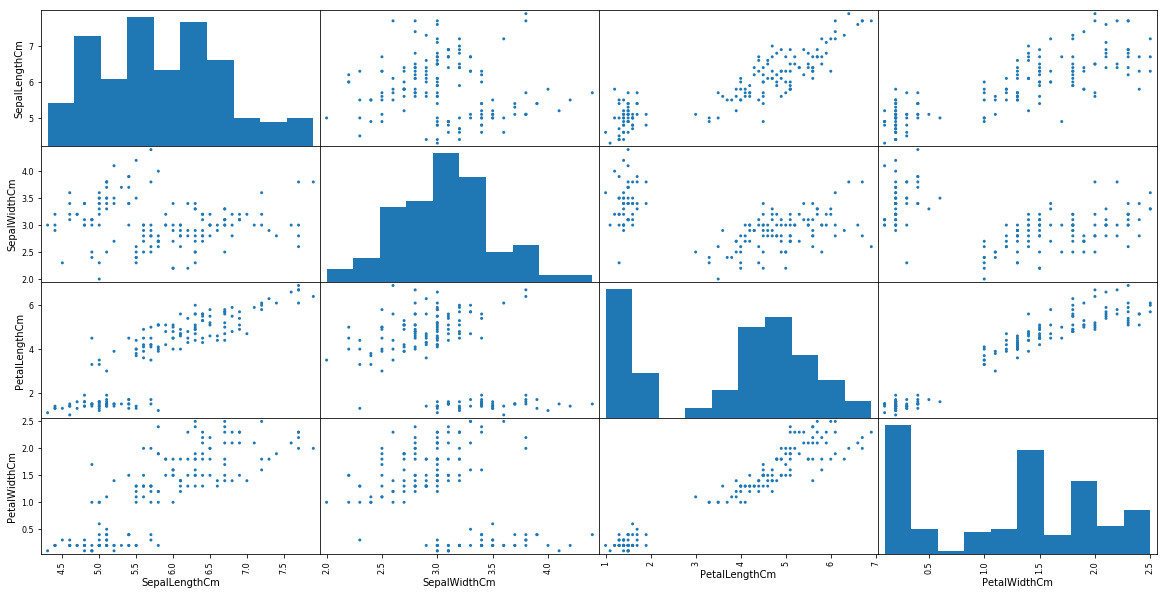

In [34]:
# ヒストグラムと散布図の行列を作成
from pandas.plotting import scatter_matrix
x = scatter_matrix(Iris, alpha=1, figsize=(20,10), diagonal='hist')
# たった一行のコードで、このように各特徴量も散布図のマトリックス（行列）が作成できてしまいます。

## データフレームのフィルタリング

In [35]:
# データフレームの行インデックスが6-20までを表示
Iris[6:20]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [36]:
# 行インデックス6-20の間で3等間隔にフィルター
Iris[6:20:3]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,4.6,3.4,1.4,0.3,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


In [37]:
# カラムに値を指定してフィルタリング
Iris[Iris.Species=='Iris-setosa'][0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
# ２つのカラム&条件を指定してフィルタリング
Iris[(Iris.Species=='Iris-setosa') & (Iris.SepalLengthCm > 5.5)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


In [39]:
#  カラムをSpeciesとSpealLengthCmのみ表示する
Iris[['Species','SepalLengthCm']][0:10]

,Species,SepalLengthCm
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7
3,Iris-setosa,4.6
4,Iris-setosa,5.0
5,Iris-setosa,5.4
6,Iris-setosa,4.6
7,Iris-setosa,5.0
8,Iris-setosa,4.4
9,Iris-setosa,4.9


## データフレームの順番の並び替え（ソート）

In [43]:
#　並べ替え
Iris.sort_values('SepalLengthCm', axis=0, ascending=False)[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,7.9,3.8,6.4,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


## 外れ値の確認

In [44]:
Iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## まとめ
如何でしたでしょうか？今回は、データサイエンティスト入門として探索的データ解析（EDA）の初歩的な内容をまとめました。

次のステップとして、次はより実践的なデータを触りながら機械学習入門をしてみては如何でしょうか？1時間〜3時間程度で行える初心者向けチュートリアルを公開していますので、是非挑戦してみてください。

初心者向けの機械学習入門チュートリアル

【Kaggle初心者入門編】タイタニック号で生き残るのは誰？
Amazon SageMakerを使って銀行定期預金の見込み顧客を予測【SageMaker ＋XGBoost 機械学習初心者チュートリアル】

機械学習をすでに触ったことがある方はこちらもオススメ

初心者のための畳み込みニューラルネットワーク（MNISTデータセット + Kerasを使ってCNNを構築）

以上となります！最後までお付き合いくださいして、ありがとうございます。